In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset (replace 'your_dataset.csv' with your actual data file)
data = pd.read_csv('weatherorg.csv')

# Define the features (independent variables) and target (dependent variables)
features = data[['Rainfall','Evaporation','Sunshine','WindGustSpeed','WindGustDirSine','WindGustDirCose',
                 'WindSpeed9am','WindDir9amSine','WindDir9amCose','WindSpeed3pm','WindDir3pmSine',
                 'WindDir3pmCose','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am',
                 'Cloud3pm','Temp9am','Temp3pm','RISK_MM','RainToday','RainTomorrow']]
target_min_temp = data['MinTemp']
target_max_temp = data['MaxTemp']

# Split the data into training and testing sets
X_train, X_test, y_train_min_temp, y_test_min_temp, y_train_max_temp, y_test_max_temp = train_test_split(features, target_min_temp, target_max_temp, test_size=0.2, random_state=42)

# Create separate Random Forest models for min and max temperature
rf_min_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_max_temp = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
rf_min_temp.fit(X_train, y_train_min_temp)
rf_max_temp.fit(X_train, y_train_max_temp)

# Make predictions
min_temp_predictions = rf_min_temp.predict(X_test)
max_temp_predictions = rf_max_temp.predict(X_test)

# Evaluate the models
min_temp_mse = mean_squared_error(y_test_min_temp, min_temp_predictions)
max_temp_mse = mean_squared_error(y_test_max_temp, max_temp_predictions)

min_temp_r2 = r2_score(y_test_min_temp, min_temp_predictions)
max_temp_r2 = r2_score(y_test_max_temp, max_temp_predictions)

print(f"Min Temperature MSE: {min_temp_mse}")
print(f"Min Temperature R-squared: {min_temp_r2}")
print(f"Max Temperature MSE: {max_temp_mse}")
print(f"Max Temperature R-squared: {max_temp_r2}")


Min Temperature MSE: 4.0330809459459465
Min Temperature R-squared: 0.888970537652907
Max Temperature MSE: 2.1960351081081053
Max Temperature R-squared: 0.9481201836690955


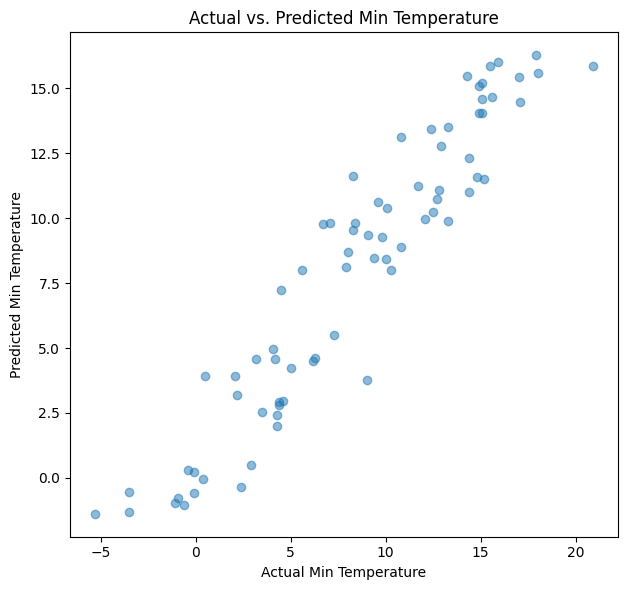

In [5]:
import matplotlib.pyplot as plt

# Create scatter plots for minimum temperature predictions
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.scatter(y_test_min_temp, min_temp_predictions, alpha=0.5)
plt.xlabel('Actual Min Temperature')
plt.ylabel('Predicted Min Temperature')
plt.title('Actual vs. Predicted Min Temperature')
plt.tight_layout()
plt.show()




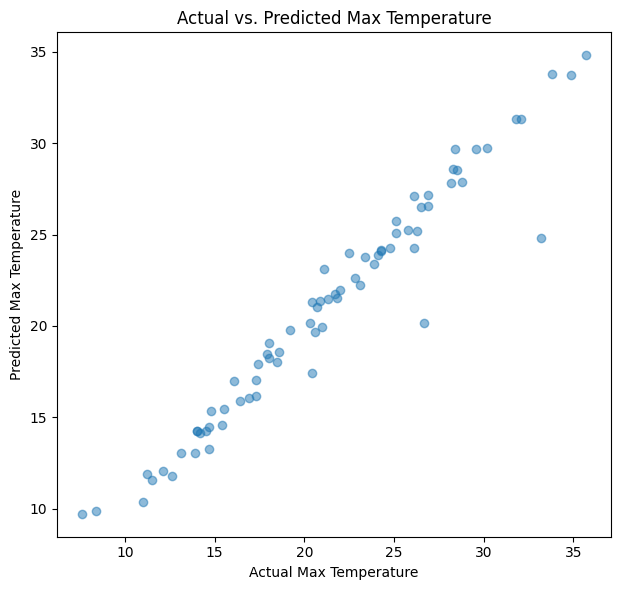

In [6]:
# Create scatter plots for maximum temperature predictions
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 2)
plt.scatter(y_test_max_temp, max_temp_predictions, alpha=0.5)
plt.xlabel('Actual Max Temperature')
plt.ylabel('Predicted Max Temperature')
plt.title('Actual vs. Predicted Max Temperature')

plt.tight_layout()
plt.show()

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE) for MinTemp
mae_min_temp = mean_absolute_error(y_test_min_temp, min_temp_predictions)
print(f'MAE for MinTemp: {mae_min_temp}')

# Calculate Mean Absolute Error (MAE) for MaxTemp
mae_max_temp = mean_absolute_error(y_test_max_temp, max_temp_predictions)
print(f'MAE for MaxTemp: {mae_max_temp}')

# Calculate Mean Error (ME) for MinTemp
me_min_temp = np.mean(min_temp_predictions - y_test_min_temp)
print(f'ME for MinTemp: {me_min_temp}')

# Calculate Mean Error (ME) for MaxTemp
me_max_temp = np.mean(max_temp_predictions - y_test_max_temp)
print(f'ME for MaxTemp: {me_max_temp}')

# Calculate Average Error (AE) for MinTemp
ae_min_temp = np.mean(np.abs(min_temp_predictions - y_test_min_temp))
print(f'AE for MinTemp: {ae_min_temp}')

# Calculate Average Error (AE) for MaxTemp
ae_max_temp = np.mean(np.abs(max_temp_predictions - y_test_max_temp))
print(f'AE for MaxTemp: {ae_max_temp}')

# Calculate Root Mean Squared Error (RMSE) for MinTemp
rmse_min_temp = np.sqrt(mean_squared_error(y_test_min_temp, min_temp_predictions))
print(f'RMSE for MinTemp: {rmse_min_temp}')

# Calculate Root Mean Squared Error (RMSE) for MaxTemp
rmse_max_temp = np.sqrt(mean_squared_error(y_test_max_temp, max_temp_predictions))
print(f'RMSE for MaxTemp: {rmse_max_temp}')

# Calculate Correlation Coefficient for MinTemp
correlation_min_temp = np.corrcoef(y_test_min_temp, min_temp_predictions, rowvar=False)[0, 1]
print(f'Correlation Coefficient for MinTemp: {correlation_min_temp}')

# Calculate Correlation Coefficient for MaxTemp
correlation_max_temp = np.corrcoef(y_test_max_temp, max_temp_predictions, rowvar=False)[0, 1]
print(f'Correlation Coefficient for MaxTemp: {correlation_max_temp}')


MAE for MinTemp: 1.622918918918919
MAE for MaxTemp: 0.7993243243243244
ME for MinTemp: -0.43191891891891937
ME for MaxTemp: -0.291540540540537
AE for MinTemp: 1.622918918918919
AE for MaxTemp: 0.7993243243243244
RMSE for MinTemp: 2.008253207627451
RMSE for MaxTemp: 1.4819025298946302
Correlation Coefficient for MinTemp: 0.9468004391336504
Correlation Coefficient for MaxTemp: 0.9749483233178611
